# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Filenames of different model outputs must be different

In [397]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))

dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))
#  SENSES MERGED harmonia
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "corpus_scripts_output")) 

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))

# change parameter file and senses etc here

genre = "all"  # "all" by default. To focus on a specific genre change the value, cfr "s_senses" file

s_senses = io.open(dir_expert+"/senses_69419.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/3_output_K15_var2/69419/output.dat","r") # model output
parameter_file = io.open(dir_parameter+"/parameters_v10_variance.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")

print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


results_file = io.open(dir_out+"/"+target_id+param_name,"w")

# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

#### SOME PARAMETERS ARE READ IN THE PARAMETER FILE

i = 0
for line in parameter_file.readlines():
    line = line.split("\t")
    if line[0] == "window_size":
        window_size = int(line[1])
        print("window_size",window_size)
            
    if line[0] == "iterations":
        iterations = int(line[1])
        print("iterations",iterations)
            
    if line[0] == "time_interval":
        time_interval = int(line[1])
        print("time_interval",time_interval)
            
        
#### START TIME AND END TIME ARE NOW DEFINED BY READING THE ANNOTATION
## (because we have the same parameter file for all things)

annotation_dates = list()
for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything
        annotation_dates.append(int(cells[0]))
    
    else:
        if cells[1] == genre:
            annotation_dates.append(int(cells[0]))
            
start_time = min(annotation_dates)
end_time = max(annotation_dates)

print("start_time",start_time)
print("end_time",end_time)
        

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 69419
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_69419.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/3_output_K15_var2/69419/output.dat' mode='r' encoding='UTF-8'>
parameters_v10_variance.txt
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/69419parameters_v10_variance.txt
window_size 5
iterations 1000
time_interval 100
start_time -430
end_time 365


93

In [398]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time+1):
    if temp_start_time + time_interval < end_time+1:
        perioddd +=1
        print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + 1

slice_duration = time_interval # read from the parameter file
print(slice_duration)

print(start_time,end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
   # if period == number_of_slices-1:
   #     for i in range(latest_i,end_time):
   #         slice_years[period].append(i)  
    
    #if period != number_of_slices-1:
    for i in range(start_time,end_time+1):
        
        if i >= int(period*slice_duration) + start_time:
            if i < int((period+1)*slice_duration) + start_time:
                slice_years[period].append(i)
                latest_i = i
                
#slice_years[period].append(latest_i+1)  #  in case we have a slice that ends on a century
                    
        
        
    

print(slice_years)

1
2
3
4
5
6
7
100
-430 365
{0: [-430, -429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331], 1: [-330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -27

## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [399]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0


for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                expert_senses.append(sense)    
            else:
                expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
        else:
             expert_senses.append("NA")
                
    else: # specific genre only
        
        if cells[1] == genre:

            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    expert_senses.append(sense)    
                else:
                    expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
            else:
                 expert_senses.append("NA")


#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
print("SET",expert_senses_set)
print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
    dict_of_words[expert_senses[i]] = list()
    print(expert_senses[i])

    for line in file_senses: # we go back in the file
        
        
        
        cells = line.split("\t") # splitting on tabs
        
        if genre == "all":   # all genres
            
            if int(cells[12]) == 1:  # senses inferred from collocates
                if cells[11] == expert_senses[i]:      # we store all words for one sense 


                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_ids_window.append(list_of_ids[n])

                        except IndexError: # if there isn't, too bad
                            sentences_smaller_than_window_size += 1

                    for word_id in list_of_ids_window:
                        if int(cells[12]) == 1:


                            if cells[11] == expert_senses[i]:  

                                dict_of_words[expert_senses[i]].append(word_id)                    

                        list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                # if the sense is "w", the collocates are put in the "NA words"

                if cells[11] == "w":
                    #print("W")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                            dummy_counter +=1

            else:  # words that are in "non collocates senses"
                #print("NON COLOC")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                #print(sentence_of_ids)
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                #print(index_of_target)
                list_of_ids_window = list()
                #print(index_of_target-window_size,index_of_target+window_size+1)
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account
                        #print(list_of_ids_window)
                        #print(list_of_ids[n])
                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                            dummy_counter +=1
                #print(list_of_NA_words)
                
        else:
            
            if cells[1] == genre:
                if int(cells[12]) == 1:  # senses inferred from collocates
                    if cells[11] == expert_senses[i]:      # we store all words for one sense 


                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_ids_window.append(list_of_ids[n])

                            except IndexError: # if there isn't, too bad
                                sentences_smaller_than_window_size += 1

                        for word_id in list_of_ids_window:
                            if int(cells[12]) == 1:


                                if cells[11] == expert_senses[i]:  

                                    dict_of_words[expert_senses[i]].append(word_id)                    

                            list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                    # if the sense is "w", the collocates are put in the "NA words"

                    if cells[11] == "w":
                        #print("W")
                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_NA_words.append(list_of_ids[n])
                                list_of_all_words.append(list_of_ids[n])
                            except IndexError:
                                dummy_counter +=1

                else:  # words that are in "non collocates senses"
                    #print("NON COLOC")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    #print(sentence_of_ids)
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    #print(index_of_target)
                    list_of_ids_window = list()
                    #print(index_of_target-window_size,index_of_target+window_size+1)
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account
                            #print(list_of_ids_window)
                            #print(list_of_ids[n])
                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                                dummy_counter +=1
                    #print(list_of_NA_words)





            
            
            
            
            
            
            
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    print("words",set(dict_of_words[expert_senses[i]]))
    print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can put that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

SET ['mus-4', 'mus-1', 'mus-2', 'NA']
ITERTOOLS ['mus-1', 'NA', 'mus-4', 'mus-2']
Number of senses: 4 ['mus-1', 'NA', 'mus-4', 'mus-2']
mus-1
i 0 sense mus-1 number of words 263
words {'51376', '47964', '64448', '42659', '82665', '8909', '104429', '84552', '104920', '49227', '38732', '15763', '110484', '84422', '69419', '678', '37711', '24856', '93786', 'nlsj114757', '47447', '40545', 'nlsj80462', '115810', '45513', '23283', '13427', '92406', '45917', '84234', '29883', '17007', '18334', '55997', '108780', '114548', '41538', '113823', 'nlsj4784', '98173', '103942', 'nlsj40053', '71065', '76765', '34855', '12641', '6174', '51300', '71308', 'nlsj69856', '63845', '58478', '83665', '110114', '114587', '100965', '105816', '64586', '16052', '46966', '80555', '52460', '14181', '89309', 'nlsj71743', '80761', '110456', '75477', '94941', '80239', '18128', '31709', '76335', 'nlsj8970', '107959', '67250', '73707', '70958', '2583', '76157', '31236', '29962', '75552', 'nlsj4320', '53695', '5607', '33

57

In [400]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    
    if genre == "all":
    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            #print(sense)


            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                #expert_senses.append(sense)

                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount[sense,period] += 1
                        counter += 1

            else:
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1



        if sense == "w":  # counting the NAs
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1
                    

    else:
        if genre == cells[1]:
            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                #print(sense)


                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    #expert_senses.append(sense)

                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount[sense,period] += 1
                            counter += 1

                else:
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1



            if sense == "w":  # counting the NAs
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1
                    
print(sense_date_amount)
print(counter)

{('mus-1', 0): 0, ('mus-1', 1): 0, ('mus-1', 2): 0, ('mus-1', 3): 0, ('mus-1', 4): 0, ('mus-1', 5): 0, ('mus-1', 6): 0, ('mus-1', 7): 0, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('NA', 7): 0, ('mus-4', 0): 0, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 0, ('mus-4', 4): 0, ('mus-4', 5): 0, ('mus-4', 6): 0, ('mus-4', 7): 0, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 0, ('mus-2', 7): 0} 

{('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, 

In [401]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])


#for word in list_of_all_words:
#    try: 
#        print(word,word_weight[word])
#    except KeyError:
#        print(word,"isnt in non-NA senses")
#    try:
#        print(word,word_weight_NA[word])
#    except KeyError:
#        print(word,"isnt in NA sense")

['mus-1', 'NA', 'mus-4', 'mus-2']


#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [402]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        print(line)
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        print(line)
        for word_prob in line:
            print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

p(w|s) = sum_t P(w|t,s)  T=-1,K=0:  111764 (0.156) ; 67009 (0.154) ; 57460 (0.138) ; 69419 (0.121) ; 75595 (0.049) ; 35417 (0.035) ; 25018 (0.032) ; 108780 (0.024) ; 71492 (0.024) ; 67974 (0.022) ; 
['  111764 (0.156) ', ' 67009 (0.154) ', ' 57460 (0.138) ', ' 69419 (0.121) ', ' 75595 (0.049) ', ' 35417 (0.035) ', ' 25018 (0.032) ', ' 108780 (0.024) ', ' 71492 (0.024) ', ' 67974 (0.022) ']
  111764 (0.156) 
word id 111764 ; probability 0.156
 67009 (0.154) 
word id 67009 ; probability 0.154
 57460 (0.138) 
word id 57460 ; probability 0.138
 69419 (0.121) 
word id 69419 ; probability 0.121
 75595 (0.049) 
word id 75595 ; probability 0.049
 35417 (0.035) 
word id 35417 ; probability 0.035
 25018 (0.032) 
word id 25018 ; probability 0.032
 108780 (0.024) 
word id 108780 ; probability 0.024
 71492 (0.024) 
word id 71492 ; probability 0.024
 67974 (0.022) 
word id 67974 ; probability 0.022
{'111764': 0.20662251655629135}
{'111764': 0.20662251655629135, '67009': 0.2039735099337748}
{'111764'

19

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [403]:
for key in k_words_with_prob.keys():
    print("output sense",key)
    for i in range(0,number_of_s):
        print("\texpert sense number ", i, expert_senses[i])
        for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            print("\t\tword from annotation for sense", key, ":", second_key)
            if second_key in dict_of_words[expert_senses[i]]:
                if expert_senses[i] != "NA":
                    print("\t\t\t\tnormal")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                else:
                    print("\t\t\t\tNA")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


output sense 0
	expert sense number  0 mus-1
		word from annotation for sense 0 : 111764
		word from annotation for sense 0 : 67009
		word from annotation for sense 0 : 57460
		word from annotation for sense 0 : 69419
				normal
			word  69419 is in output for sense 0 with probability: 0.16026490066225163 and weight: 0.3333333333333333
		word from annotation for sense 0 : 75595
		word from annotation for sense 0 : 35417
		word from annotation for sense 0 : 25018
		word from annotation for sense 0 : 108780
				normal
			word  108780 is in output for sense 0 with probability: 0.03178807947019867 and weight: 0.5
		word from annotation for sense 0 : 71492
		word from annotation for sense 0 : 67974
				normal
			word  67974 is in output for sense 0 with probability: 0.029139072847682114 and weight: 1.0
	expert sense number  1 NA
		word from annotation for sense 0 : 111764
		word from annotation for sense 0 : 67009
		word from annotation for sense 0 : 57460
		word from annotation for sense 0

		word from annotation for sense 10 : 45996
				normal
			word  45996 is in output for sense 10 with probability: 0.12037037037037035 and weight: 0.5
		word from annotation for sense 10 : 84552
		word from annotation for sense 10 : 76157
		word from annotation for sense 10 : 3327
		word from annotation for sense 10 : 100964
		word from annotation for sense 10 : 35244
		word from annotation for sense 10 : 111207
output sense 11
	expert sense number  0 mus-1
		word from annotation for sense 11 : 66173
		word from annotation for sense 11 : 42267
		word from annotation for sense 11 : nlsj12527
		word from annotation for sense 11 : 47876
		word from annotation for sense 11 : 75653
		word from annotation for sense 11 : 39847
				normal
			word  39847 is in output for sense 11 with probability: 0.0051440329218107 and weight: 1.0
		word from annotation for sense 11 : 71492
		word from annotation for sense 11 : 12349
		word from annotation for sense 11 : 75954
		word from annotation for sense 1

In [404]:
print(expert_senses)

['mus-1', 'NA', 'mus-4', 'mus-2']


In [405]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    print("\n")
    print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            print("k,mot",k,mot)
            print("s",s,"expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 4
number of model output senses k: 15


Choose best match for k = 0
k,mot 0 111764
s 0 expert_senses[s] mus-1
k,mot 0 67009
s 0 expert_senses[s] mus-1
k,mot 0 57460
s 0 expert_senses[s] mus-1
k,mot 0 69419
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.16026490066225163
word_weight[mot] 0.3333333333333333
sense mus-1 mot 69419 match_weighted 0.05342163355408387
k,mot 0 75595
s 0 expert_senses[s] mus-1
k,mot 0 35417
s 0 expert_senses[s] mus-1
k,mot 0 25018
s 0 expert_senses[s] mus-1
k,mot 0 108780
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.03178807947019867
word_weight[mot] 0.5
sense mus-1 mot 108780 match_weighted 0.015894039735099334
k,mot 0 71492
s 0 expert_senses[s] mus-1
k,mot 0 67974
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.029139072847682114
word_weight[mot] 1.0
sense mus-1 mot 67974 match_weighted 0.029139072847682114
k,mot 0 111764
s 1 expert_senses[s] NA
k,mot 0 67009
s 1 expert_senses[s] NA
k,mot 0 57460
s 1 expert_

s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.03401360544217687
word_weight[mot] 0.5
sense NA mot 68641 match_weighted 0.017006802721088433
k,mot 6 104872
s 1 expert_senses[s] NA
k,mot 6 22467
s 1 expert_senses[s] NA
k,mot 6 83212
s 2 expert_senses[s] mus-4
k,mot 6 106502
s 2 expert_senses[s] mus-4
k,mot 6 436
s 2 expert_senses[s] mus-4
k,mot 6 59708
s 2 expert_senses[s] mus-4
k,mot 6 32657
s 2 expert_senses[s] mus-4
k,mot 6 74378
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.05442176870748299
word_weight[mot] 0.5
sense mus-4 mot 74378 match_weighted 0.027210884353741496
k,mot 6 52035
s 2 expert_senses[s] mus-4
k,mot 6 68641
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.03401360544217687
word_weight[mot] 1.0
sense mus-4 mot 68641 match_weighted 0.03401360544217687
k,mot 6 104872
s 2 expert_senses[s] mus-4
k,mot 6 22467
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.018140589569160998
word_weight[mot] 1.0
sense mus-4 mot 22467 match_weighted 0.01814058956

s 2 expert_senses[s] mus-4
k,mot 13 37405
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.09169550173010381
word_weight[mot] 1.0
sense mus-4 mot 37405 match_weighted 0.09169550173010381
k,mot 13 47876
s 2 expert_senses[s] mus-4
k,mot 13 59005
s 2 expert_senses[s] mus-4
k,mot 13 36160
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.0726643598615917
word_weight[mot] 1.0
sense mus-4 mot 36160 match_weighted 0.0726643598615917
k,mot 13 7245
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.06401384083044982
word_weight[mot] 1.0
sense mus-4 mot 7245 match_weighted 0.06401384083044982
k,mot 13 95522
s 3 expert_senses[s] mus-2
k,mot 13 nlsj9526
s 3 expert_senses[s] mus-2
k,mot 13 80327
s 3 expert_senses[s] mus-2
k,mot 13 42267
s 3 expert_senses[s] mus-2
k,mot 13 63550
s 3 expert_senses[s] mus-2
k,mot 13 37405
s 3 expert_senses[s] mus-2
k,mot 13 47876
s 3 expert_senses[s] mus-2
k,mot 13 59005
s 3 expert_senses[s] mus-2
k,mot 13 36160
s 3 expert_senses[s] mus-2
k,mot 13 7245


In [406]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
    print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.0984547461368653, (0, 1): 0.11423841059602648, (0, 2): 0.7275938189845473, (0, 3): 0.05342163355408387, (1, 0): 0.14845360824742268, (1, 1): 0.12302405498281788, (1, 2): 0.7298969072164949, (1, 3): 0.12164948453608247, (2, 0): 0.23296158612143744, (2, 1): 0.70817843866171, (2, 2): 0.07311028500619579, (2, 3): 0.032218091697645605, (3, 0): 0.5813672111312764, (3, 1): 0.44872958257713247, (3, 2): 0.17120387174833634, (3, 3): 0.09497882637628553, (4, 0): 0.3954545454545454, (4, 1): 0.5628787878787879, (4, 2): 0.2606060606060606, (4, 3): 0, (5, 0): 0.1269565217391304, (5, 1): 0.521159420289855, (5, 2): 0.05391304347826086, (5, 3): 0.3704347826086956, (6, 0): 0.12811791383219956, (6, 1): 0.5606575963718821, (6, 2): 0.07936507936507936, (6, 3): 0.2970521541950113, (7, 0): 0.09557661927330172, (7, 1): 0.5281727224855185, (7, 2): 0.43996840442338064, (7, 3): 0, (8, 0): 0.176056338028169, (8, 1): 0.6214788732394365, (8, 2): 0.18661971830985913, (8, 3): 0.10915492957746478, (9, 0): 0.

Correct pairs (Alessandro): v1

- K0 - S0 / S1
- K1 - S3 / S1
- K2 - S3
- K3 - S2
- K4 - S0 / S1

In [407]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
print(expert_senses[3])        
        
    

{0: 2, 1: 2, 2: 1, 3: 'NA', 4: 'NA', 5: 1, 6: 1, 7: 'NA', 8: 1, 9: 'NA', 10: 'NA', 11: 1, 12: 'NA', 13: 1, 14: 'NA'}
for each s, the k (or more) assigned to it: {2: [0, 1], 1: [2, 5, 6, 8, 11, 13], 'NA': [3, 4, 7, 9, 10, 12, 14]}
mus-2


## Q3: How well does the model assign the right words to a given sense of the target word?

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

In [408]:
precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

			THIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below



For pair ks 0 2 :
252
The RECALL is 0.8503311258278144 / 236.66666666666669 = 0.9054230015856728
The PRECISION is 0.8503311258278144 * number of expert words in that sense/ 0.9999999999999999 = 0.8503311258278146 

The F-SCORE is 0.8770127300488781 

For pair ks 1 2 :
252
The RECALL is 0.8371134020618557 / 236.66666666666669 = 0.8913489182517786
The PRECISION is 0.8371134020618557 * number of expert words in that sense/ 1.0 = 0.8371134020618557 

The F-SCORE is 0.8633802618809863 

For pair ks 2 1 :
498
The RECALL is 0.7893432465923172 / 102.16666666666666 = 3.8475654499475436
The PRECISION is 0.7893432465923172 * number of expert words in that sense/ 1.0 = 0.7893432465923172 

The F-SCORE is 1.3099459154778361 

K 3 s is NA
K 4 s is NA
For pair ks 5 1 :
498
The RECALL is 0.6295652173913043 / 102.16666666666666 = 3.0687453010851837
The PRECISION is 0.6295652173913043 * number of expert words in that sense/ 1.0 = 0.62956

## P and R based on S, with adapted word weight for NA

In [409]:
print(s_k_match)
print(expert_senses)

{2: [0, 1], 1: [2, 5, 6, 8, 11, 13], 'NA': [3, 4, 7, 9, 10, 12, 14]}
['mus-1', 'NA', 'mus-4', 'mus-2']


In [410]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


{2: [0, 1], 1: [2, 5, 6, 8, 11, 13], 'NA': [3, 4, 7, 9, 10, 12, 14]}
s and k: 2 [0, 1]
s_k_match[key][any_k] 0
111764 2
67009 2
57460 2
69419 2
75595 2
35417 2
25018 2
108780 2
71492 2
67974 2
s_k_match[key][any_k] 1
75595 2
45996 2
70495 2
26034 2
111764 2
45980 2
48504 2
64586 2
nlsj71743 2
15609 2
num precision 1.6874445278896701 for s 2 and a total of 2 k
denom precision 2.0 for s 2 and a total of 2 k
num recall 1.6874445278896701 for s 2 and a total of 2 k
denom recall 473.3333333333333 for s 2 and a total of 2 k
recall: 0.8983859599187258
precision: 0.8437222639448351
fscore: 0.8701964959649322


s and k: 1 [2, 5, 6, 8, 11, 13]
s_k_match[key][any_k] 2
111764 1
67009 1
57460 1
69419 1
75595 1
35417 1
25018 1
108780 1
71492 1
67974 1
s_k_match[key][any_k] 5
75595 1
45996 1
70495 1
26034 1
111764 1
45980 1
48504 1
64586 1
nlsj71743 1
15609 1
s_k_match[key][any_k] 6
46804 1
61925 1
16132 1
71492 1
116416 1
33631 1
11305 1
83209 1
59708 1
67526 1
s_k_match[key][any_k] 8
59708 1
52571 

In [411]:
type(expert_senses)
print(str(expert_senses))

['mus-1', 'NA', 'mus-4', 'mus-2']


In [412]:
print(precision_recall_k)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in precision_recall_k:
    try:
        total_recall += precision_recall_k[key][0]
    except IndexError:
        print("nothing for k",key)
    try: 
        total_precision += precision_recall_k[key][1]
    except IndexError:
        print("nothing for k",key)
        
    try: 
        total_fscore += precision_recall_k[key][2]
    except IndexError:
        print("nothing for k",key)
        
        
print("AVERAGED SCORES BASED ON Ks:")    
print("averaged recall = ",total_recall/number_of_the_k)
print("averaged precision = ",total_precision/number_of_the_k)
print("averaged fscore = ",total_fscore/number_of_the_k)
print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("AVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

{0: [0.9054230015856728, 0.8503311258278146, 0.8770127300488781], 1: [0.8913489182517786, 0.8371134020618557, 0.8633802618809863], 2: [3.8475654499475436, 0.7893432465923172, 1.3099459154778361], 3: [], 4: [], 5: [3.0687453010851837, 0.6295652173913043, 1.0447880419690183], 6: [3.050637547025336, 0.6258503401360546, 1.0386230582207892], 7: [], 8: [3.48415780162213, 0.7147887323943661, 1.1862197902773484], 9: [], 10: [], 11: [4.738988580750408, 0.9722222222222222, 1.613440710913635], 12: [], 13: [3.27208069678308, 0.6712802768166091, 1.1140158106792712], 14: []}
nothing for k 3
nothing for k 3
nothing for k 3
nothing for k 4
nothing for k 4
nothing for k 4
nothing for k 7
nothing for k 7
nothing for k 7
nothing for k 9
nothing for k 9
nothing for k 9
nothing for k 10
nothing for k 10
nothing for k 10
nothing for k 12
nothing for k 12
nothing for k 12
nothing for k 14
nothing for k 14
nothing for k 14
AVERAGED SCORES BASED ON Ks:
averaged recall =  1.5505964864700752
averaged precision =

81

In [413]:
print(expert_senses)

['mus-1', 'NA', 'mus-4', 'mus-2']


In [414]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [415]:
for key in slice_years.keys():
    print(key,slice_years[key],"\n")

0 [-430, -429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331] 

1 [-330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -270, -269, -268, -267, -266, -2

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [416]:
total_period = dict()
print(number_of_slices)

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    if total_period[key[1]] != 0:
        sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    else:
        sense_period_relative[key] = 0
    print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

8
total period {0: 40, 1: 7, 2: 4, 3: 5, 4: 8, 5: 50, 6: 89, 7: 2}
sense date amount {('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 22, ('mus-2', 7): 0}
('mus-1', 0) total for this sense at this period 3 total period 40
relative 0.075
('mus-1', 1) total for this sense at this period 4 total period 7
relative 0.5714285714285714
('mus-1', 2) total for this sense at this period 1 total period 4
relative 0.25
('mus-1', 3) total for this sense at this period 2 total period 5
relative 0.4
('mus-1', 4) total for this sense at this period 2 

In [417]:
for key,vals in period_relative.items():
    print("\n",key,vals)
    print("len vals",len(vals))

#for key in valeurs.keys():
#    print("period",key,valeurs[key])
#    print(type(key))
    



 0 [0.075, 0.4, 0.525, 0.0]
len vals 4

 1 [0.5714285714285714, 0.42857142857142855, 0.0, 0.0]
len vals 4

 2 [0.25, 0.75, 0.0, 0.0]
len vals 4

 3 [0.4, 0.4, 0.2, 0.0]
len vals 4

 4 [0.25, 0.75, 0.0, 0.0]
len vals 4

 5 [0.28, 0.3, 0.42, 0.0]
len vals 4

 6 [0.15730337078651685, 0.5056179775280899, 0.0898876404494382, 0.24719101123595505]
len vals 4

 7 [0.0, 0.5, 0.5, 0.0]
len vals 4


liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

## Reading model output (period_relative_model)


In [418]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(i,x)
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                #print(lines_output_plot[x][0:15])
                string = lines_output_plot[x][0:15].replace("Time=","")
                string = string.replace("  ","")
                period = string
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                
                
                templist.append(float(ligne[0]))
            
            #print(period,templist)
            
        period_relative_model[str(period)] = templist



## plotting model output (draft)

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~

In [419]:
print(len(period_relative[3]))
print(expert_senses)
print(period_relative,"\n")
print(period_relative_model)

4
['mus-1', 'NA', 'mus-4', 'mus-2']
{0: [0.075, 0.4, 0.525, 0.0], 1: [0.5714285714285714, 0.42857142857142855, 0.0, 0.0], 2: [0.25, 0.75, 0.0, 0.0], 3: [0.4, 0.4, 0.2, 0.0], 4: [0.25, 0.75, 0.0, 0.0], 5: [0.28, 0.3, 0.42, 0.0], 6: [0.15730337078651685, 0.5056179775280899, 0.0898876404494382, 0.24719101123595505], 7: [0.0, 0.5, 0.5, 0.0]} 

{'0': [0.0027162311068582544, 4.511004148431746e-10, 0.008408711739704373, 1.2374988685208434e-10, 1.0629398896543327e-07, 1.3949865851625725e-12, 3.1721483332113904e-21, 8.58031300155315e-15, 3.8621155139389233e-17, 4.076786766349129e-12, 2.2638589866358725e-15, 6.686506315120828e-28, 0.988370739788227, 2.81784853644858e-09, 0.0005042076730397022], '1': [0.5635447352516761, 0.0001101062891589869, 0.023065671730931808, 1.428339760145948e-10, 3.5054623469337166e-05, 1.993150657768539e-05, 1.6952168999283695e-16, 2.992066481149229e-06, 6.3892036287660865e-09, 2.1163289943805914e-05, 7.001598582363396e-16, 7.577679113657175e-24, 0.4131527560057652, 4.15

## Correlation

In [420]:
#print(period_relative_model) # period_relative_model[PERIOD] = [list of probabilities for Ks]
period_relative # period_relative[PERIOD] = [list of relative frequencies for Ss]

print(expert_senses)
print("period relative:",len(period_relative))
print("period relative model:",len(period_relative_model),"\n") 

for i in range(0,len(period_relative)):
    print("period",i,"\nS",period_relative[i],"\nK",period_relative_model[str(i)],"\n",len(period_relative[i]),len(period_relative_model[str(i)]),"\n")

['mus-1', 'NA', 'mus-4', 'mus-2']
period relative: 8
period relative model: 11 

period 0 
S [0.075, 0.4, 0.525, 0.0] 
K [0.0027162311068582544, 4.511004148431746e-10, 0.008408711739704373, 1.2374988685208434e-10, 1.0629398896543327e-07, 1.3949865851625725e-12, 3.1721483332113904e-21, 8.58031300155315e-15, 3.8621155139389233e-17, 4.076786766349129e-12, 2.2638589866358725e-15, 6.686506315120828e-28, 0.988370739788227, 2.81784853644858e-09, 0.0005042076730397022] 
 4 15 

period 1 
S [0.5714285714285714, 0.42857142857142855, 0.0, 0.0] 
K [0.5635447352516761, 0.0001101062891589869, 0.023065671730931808, 1.428339760145948e-10, 3.5054623469337166e-05, 1.993150657768539e-05, 1.6952168999283695e-16, 2.992066481149229e-06, 6.3892036287660865e-09, 2.1163289943805914e-05, 7.001598582363396e-16, 7.577679113657175e-24, 0.4131527560057652, 4.158025624362287e-09, 4.7578545931934565e-05] 
 4 15 

period 2 
S [0.25, 0.75, 0.0, 0.0] 
K [2.656847484469269e-06, 0.09867487739079282, 0.030532043677737684, 

In [421]:
print("periods for model",len(period_relative_model))
print("periods for expert",len(period_relative))
period_relative_model[str(0)]

periods for model 11
periods for expert 8


[0.0027162311068582544,
 4.511004148431746e-10,
 0.008408711739704373,
 1.2374988685208434e-10,
 1.0629398896543327e-07,
 1.3949865851625725e-12,
 3.1721483332113904e-21,
 8.58031300155315e-15,
 3.8621155139389233e-17,
 4.076786766349129e-12,
 2.2638589866358725e-15,
 6.686506315120828e-28,
 0.988370739788227,
 2.81784853644858e-09,
 0.0005042076730397022]

In [422]:
print(s_k_match)

{2: [0, 1], 1: [2, 5, 6, 8, 11, 13], 'NA': [3, 4, 7, 9, 10, 12, 14]}


In [423]:
for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        print("KEY LOOKED AT ",key)
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            print("vs")
            print("period",i,"freq",period_relative[i][key])
            print("TEMP LIST S is appended",temp_list_s.append(period_relative[i][key]))
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k,"period",i)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            print("TEMP LIST K is appended",temp_list_k.append(temp_score_k))
            
    print("TEMP LIST S=",key,"at PERIOD",i,temp_list_s)
    print("TEMP LIST K for S=",key,"at PERIOD",i,temp_list_k)
            

KEY LOOKED AT  2
we have 2 Ks for S 2
period 0 freq 0.525
vs
period 0 freq 0.525
TEMP LIST S is appended None
K: 0 period 0
période 0 prob 0.0027162311068582544
K: 1 period 0
période 0 prob 4.511004148431746e-10
total score for Ks 0.0027162315579586692 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 2 Ks for S 2
period 1 freq 0.0
vs
period 1 freq 0.0
TEMP LIST S is appended None
K: 0 period 1
période 1 prob 0.5635447352516761
K: 1 period 1
période 1 prob 0.0001101062891589869
total score for Ks 0.5636548415408351 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 2 Ks for S 2
period 2 freq 0.0
vs
period 2 freq 0.0
TEMP LIST S is appended None
K: 0 period 2
période 2 prob 2.656847484469269e-06
K: 1 period 2
période 2 prob 0.09867487739079282
total score for Ks 0.0986775342382773 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 2 Ks for S 2
period 3 freq 0.2
vs
period 3 freq 0.2
TEMP LIST S is appended None
K: 0 period 3
période 3 prob 1.4422340427317604e-05
K: 1 peri

In [424]:
correl_pairs = dict() # correl_pairs[s] = list(  liste_freq_s_for_each_t , liste_probs_k_for_each_t )

NA_key = expert_senses.index("NA") #get index of the expert sense for sense NA, so we can use it in period_relative
print("NA sense is at index",NA_key)


NA_counter = 0
for key in s_k_match.keys():
    if key == "NA":
        NA_counter += len(s_k_match[key])
        #print("NA",NA_counter)
    if key == NA_key:
        NA_counter += len(s_k_match[key])
        #print("NA_key",NA_counter)
        
print("NA_counter",NA_counter)

for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        
        if (key != "NA" and key != NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            temp_list_s.append(period_relative[i][key])  # temp_list_s is the list of relative freq of expert sense key for each period i
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k/len(s_k_match[key])) # temp_list_s is the list of probabilities of all k matching expert sense key for each period i
            # normalising to account for more than 1 k matching the same key

            
        if key == "NA":  # this is when a k cannot be matched to any expert sense
                        # In this case we take the frequencies that we have, i.e. the "true NA" from the annotation
            
            print("period",i,"freq",period_relative[i][NA_key])  # we need the frequency from the annotation ("true" NA sense)
            temp_list_s.append(period_relative[i][NA_key])
            #print("PERIOD RELATIVE FOR S = NA WITH PERIOD",i,period_relative[i][NA_key])
            temp_score_k = 0
                
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            temp_list_k.append(temp_score_k/len(s_k_match[key]))
            # normalising to account for more than 1 k matching the same key

        if key == NA_key:  # these are the true NA senses which correspond to when a K has been matched to the expert sense "NA"
                            # an expert sense NA is where the expert annotated non-collocates or non-1
            print("we have",len(s_k_match[key]),"Ks for S NA_no_k")
            temp_score_k = 0
            temp_list_s.append(period_relative[i][NA_key])
            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k/len(s_k_match[key]))
            # normalising to account for more than 1 k matching the same key
    
    print("\n\tS",key,temp_list_s)
    print("\n\tconsolidated_K for S",temp_list_k)
    correl_pairs[key].append(temp_list_s)
    correl_pairs[key].append(temp_list_k)

#print("NA0",correl_pairs["NA"][0])
#print("NA1",correl_pairs["NA"][1])
#print("NA_key0",correl_pairs[NA_key][0])
#print("NA_key1",correl_pairs[NA_key][1],"\n")

print(correl_pairs)
for key in correl_pairs:
    print(key)
    print("LOOK HERE",key,correl_pairs[key],"\n")
    
    
#print(correl_pairs[NA_key])
    
# Now we normalise the frequency lists and probability lists IF we have the two types of NA 

if ((NA_key and "NA") in s_k_match.keys()) and NA_key in correl_pairs.keys():
    
    
    # and ((NA_key and "NA") in correl_pairs.keys())):
    for i in range(0,len(correl_pairs["NA"][0])):  # first item is list of frequencies, second is list of probabilities 
        # we replace the frequencies by the sum of them / 2
        correl_pairs["NA"][0][i] = (correl_pairs[NA_key][0][i] + correl_pairs["NA"][0][i])/2
        # we replace the probabilities by the sum of them / 2
        correl_pairs["NA"][1][i] = (correl_pairs[NA_key][1][i] + correl_pairs["NA"][1][i])/2
        
    # we delete one of the two entries
    del correl_pairs[NA_key]


#correl_pairs["NA"][1] = correl_pairs[NA_key][1]

#del correl_pairs[NA_key]

# if we have several Ks for sense NA
#for item in range(0,len(correl_pairs["NA"][1])):
#    print("ancien item",correl_pairs["NA"][1][item])
#    print("new item", correl_pairs["NA"][1][item]/NA_counter,"\n")
#    correl_pairs["NA"][1][item] = correl_pairs["NA"][1][item]/NA_counter
    
#normalising probabilities
#for item in range(0,len(correl_pairs["NA"][1])):
    

# if we have several Ks for any other sense
#for key in s_k_match.keys():
#    if (key != "NA" and key != NA_key):
#        print("SENSE",key)
#        for item in range(0,len(correl_pairs[key][1])):
#            print("ancien item non NA",correl_pairs[key][1][item])
#            print("new item non NA", correl_pairs[key][1][item]/len(s_k_match[key]),"\n")
#            correl_pairs[key][1][item] = correl_pairs[key][1][item]/len(s_k_match[key])

    
print(correl_pairs)
    

NA sense is at index 1
NA_counter 13
we have 2 Ks for S 2
period 0 freq 0.525
K: 0
période 0 prob 0.0027162311068582544
K: 1
période 0 prob 4.511004148431746e-10
total score for Ks 0.0027162315579586692 

we have 2 Ks for S 2
period 1 freq 0.0
K: 0
période 1 prob 0.5635447352516761
K: 1
période 1 prob 0.0001101062891589869
total score for Ks 0.5636548415408351 

we have 2 Ks for S 2
period 2 freq 0.0
K: 0
période 2 prob 2.656847484469269e-06
K: 1
période 2 prob 0.09867487739079282
total score for Ks 0.0986775342382773 

we have 2 Ks for S 2
period 3 freq 0.2
K: 0
période 3 prob 1.4422340427317604e-05
K: 1
période 3 prob 0.1404249316202336
total score for Ks 0.1404393539606609 

we have 2 Ks for S 2
period 4 freq 0.0
K: 0
période 4 prob 6.164368375449389e-06
K: 1
période 4 prob 0.31396020164948496
total score for Ks 0.31396636601786043 

we have 2 Ks for S 2
period 5 freq 0.42
K: 0
période 5 prob 1.2554617228864516e-09
K: 1
période 5 prob 0.9993059241458881
total score for Ks 0.99930592

In [425]:
print(s_k_match)



for key in correl_pairs.keys():
    print("SENSE",key)
    for item in correl_pairs[key]:
        print(item,"\n")

{2: [0, 1], 1: [2, 5, 6, 8, 11, 13], 'NA': [3, 4, 7, 9, 10, 12, 14]}
SENSE 2
[0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5] 

[0.0013581157789793346, 0.28182742077041756, 0.04933876711913865, 0.07021967698033045, 0.15698318300893022, 0.49965296270067494, 0.35268490277141584, 0.07648209397568444] 

SENSE NA
[0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5] 

[0.0713346586334666, 0.03144234005404439, 0.0647436814862564, 0.06808315599743008, 0.049126749629050996, 4.957686650354681e-05, 0.02104508477914005, 0.0647622274964432] 



In [426]:
import scipy.stats

list_significant_correl = list()

for key in correl_pairs.keys():
    for item in correl_pairs[key]:
        print("S",key,"freq then prob",item)
    print("\ncorrelation:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])
    print("p-value:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1])
    
    if scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1] <= 0.05:
        list_significant_correl.append(scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])

    print("\n")
    
positive_significant_correl = list()
print("significant correlations:",list_significant_correl)

for i in list_significant_correl:
    if i > 0:
        positive_significant_correl.append(i)
        
print("significant correlations that are positive:",len(positive_significant_correl))
print("above divided by number of s-k matches:",len(positive_significant_correl)/len(s_k_match.keys()))
print("sk matches for reference:",len(s_k_match.keys()))


S 2 freq then prob [0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5]
S 2 freq then prob [0.0013581157789793346, 0.28182742077041756, 0.04933876711913865, 0.07021967698033045, 0.15698318300893022, 0.49965296270067494, 0.35268490277141584, 0.07648209397568444]

correlation: -0.21957751641341997
p-value: 0.6013342104769552


S NA freq then prob [0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5]
S NA freq then prob [0.0713346586334666, 0.03144234005404439, 0.0647436814862564, 0.06808315599743008, 0.049126749629050996, 4.957686650354681e-05, 0.02104508477914005, 0.0647622274964432]

correlation: -0.048196269271187996
p-value: 0.909771840305317


significant correlations: []
significant correlations that are positive: 0
above divided by number of s-k matches: 0.0
sk matches for reference: 3


In [427]:
#### print(correl_pairs)
#print("\n",correl_pairs[2])

## plotting correl_pairs

freq
[0.525, 0.4]
[0.0, 0.42857142857142855]
[0.0, 0.75]
[0.2, 0.4]
[0.0, 0.75]
[0.42, 0.3]
[0.0898876404494382, 0.5056179775280899]
[0.5, 0.5]
prob
[0.018682954254485133, 0.9813170457455149]
[0.8996317423957723, 0.10036825760422768]
[0.43248341635617193, 0.5675165836438281]
[0.5077240680356994, 0.49227593196430064]
[0.7616478303578946, 0.23835216964210532]
[0.9999007872432538, 9.921275674621993e-05]
[0.9436890656886526, 0.05631093431134745]
[0.5414879209199004, 0.45851207908009967]
0 [0.018682954254485133, 0.9813170457455149]
1 [0.8996317423957723, 0.10036825760422768]
2 [0.43248341635617193, 0.5675165836438281]
3 [0.5077240680356994, 0.49227593196430064]
4 [0.7616478303578946, 0.23835216964210532]
5 [0.9999007872432538, 9.921275674621993e-05]
6 [0.9436890656886526, 0.05631093431134745]
7 [0.5414879209199004, 0.45851207908009967]


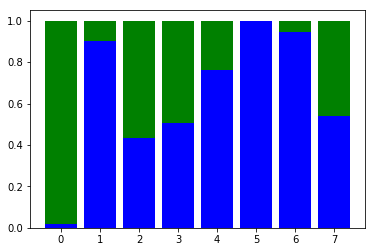

In [428]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


#valeurs = {"p1":[0.4, 0.55, 0.05, 0.0], "p2":[0.2, 0.3, 0.5, 0.0], "p3":[0.4, 0.2, 0.2, 0.2], "p4":[0.2, 0.2, 0.2, 0.4], "p5":[0.4, 0.55, 0.05, 0.0], "p6":[0.4, 0.55, 0.05, 0.0], "p7":[0.4, 0.55, 0.05, 0.0]}
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','deeppink']

valeurs_freq = dict()
valeurs_prob = dict()

for x in range(0,number_of_slices):   # initialising values[timeperiod] = "list of freq" dictionaries
    valeurs_freq[x] = list()
    valeurs_prob[x] = list()


for x in range(0,number_of_slices):
    list_freq = list()
    list_prob = list()
    total_prob_slice = 0
    
    for sense in correl_pairs.keys():
        #print("\t\t",x,sense)
        list_freq.append(correl_pairs[sense][0][x])
        list_prob.append(correl_pairs[sense][1][x])
        total_prob_slice += correl_pairs[sense][1][x]  # this counts the total probability for Tx, for normalising
        
    valeurs_freq[x] = list_freq
    valeurs_prob[x] = list_prob
    for i in range(0,len(valeurs_prob[x])):
        valeurs_prob[x][i] = valeurs_prob[x][i]/total_prob_slice
    
print("freq")
for key in valeurs_freq:
    print(valeurs_freq[key])
    
print("prob")
for key in valeurs_prob:
    print(valeurs_prob[key])


#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs
    

#for key,vals in valeurs_freq.items():
#    print(key,vals)
    
#    for i in range(0,len(vals)):        
#        if i == 0:
#            previous = 0
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#        else:         
#            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#plt.xticks(range(len(valeurs_freq)), valeurs_freq.keys())

#plt.show()

#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs

previous = 0

for key,vals in valeurs_prob.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
plt.xticks(range(len(valeurs_prob)), valeurs_prob.keys())

plt.show()

## plotting expert

0 [0.075, 0.4, 0.525, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 3
TOTAL HITS FOR SENSE NA 16
TOTAL HITS FOR SENSE mus-4 21
TOTAL HITS FOR SENSE mus-2 0
1 [0.5714285714285714, 0.42857142857142855, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 4
TOTAL HITS FOR SENSE NA 3
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
2 [0.25, 0.75, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 1
TOTAL HITS FOR SENSE NA 3
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
3 [0.4, 0.4, 0.2, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 2
TOTAL HITS FOR SENSE NA 2
TOTAL HITS FOR SENSE mus-4 1
TOTAL HITS FOR SENSE mus-2 0
4 [0.25, 0.75, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 2
TOTAL HITS FOR SENSE NA 6
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
5 [0.28, 0.3, 0.42, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 14
TOTAL HITS FOR SENSE NA 15
TOTAL HITS FOR SENSE mus-4 21
TOTAL HITS FOR SENSE mus-2 0
6 [0.15730337078651685, 0.5056179775

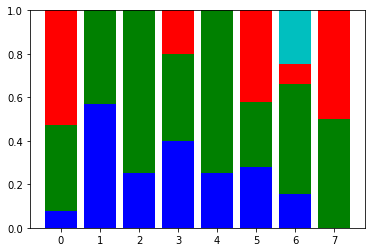

In [429]:
import numpy as np
import matplotlib.pyplot as plt

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


valeurs = period_relative
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','magenta','peru']
#colours = ['b','g','r','c','m','y','k','w']
colors = couleurs

for key,vals in valeurs.items():
    print(key,vals)
    print("lenght of vals",len(vals))
    
    
    
    for i in range(0,len(vals)):        
        if i == 0:
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = 0
            #print(i)
            #print(colours[i],"height=",vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
        else:         
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = vals[i-1] + previous
            #print("i",i,"key=period",key)
            #print(colours[i],"height=",vals[i])
            #print(vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
plt.xticks(range(len(valeurs)), valeurs.keys())

expert_image = s_senses.name.split("/")[-1]

#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+expert_image+".png")
plt.show()